In [1]:
import os,sys,json
from glob import glob

os.chdir('/home/avijit/projects/Awareness_vs_Unawareness')
sys.path.insert(0,"/home/avijit/projects/Awareness_vs_Unawareness/robustfairnesscode")

In [2]:
import warnings
warnings.filterwarnings('ignore')

from robustfairnesscode import data, losses, optimization, model, utils, dro_training, softweights_training
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import shap
import traceback

In [3]:
def writejson(path,arr,name):
    try:
        os.mkdir(path+'preds/')
    except:
        pass
    f = open(path+'preds/'+name,'w')
    json.dump(arr,f)
    f.close()

In [4]:
paths = {0:'data/datasets/diabetes/',
         0.2:'data/datasets/diabetes/synthetic/gender_flip_labels0.2_version0/',
         0.4:'data/datasets/diabetes/synthetic/gender_flip_labels0.4_version0/',
         0.6:'data/datasets/diabetes/synthetic/gender_flip_labels0.6_version0/',
         0.8:'data/datasets/diabetes/synthetic/gender_flip_labels0.8_version0/'
        }

In [5]:
def dothings(model,name):
    session = tf.Session()
    session.run((tf.global_variables_initializer(),tf.local_variables_initializer()))
    
    def f(test_df):
        val = session.run(model.predictions_tensor,feed_dict=model.feed_dict_helper(test_df))
        vall = [float(v[0]) for v in val]
        val_m = [0 if i < 0 else 1 for i in vall]
        return val_m
    
    explainer = shap.Explainer(f, test_df)
    shap_values = explainer(test_df.sample(n=500))
    
    clist = list(FEATURE_NAMES)
    features = {}
    for i in range(len(clist)):
        fname = clist[i]
        item = fname.split('_')[0]
        if item not in features:
            features[item]=[]
        features[item].append(i)
    newshap = {}
    for k in features:
        nshap = []
        for x in shap_values.values:
            val = 0
            for i in features[k]:
                val+= x[i]
            nshap.append(val)
        newshap[k] = nshap
    new_shap_values = list(zip(*newshap.values()))
    shap_values.values = np.array(new_shap_values)
    shap_values.feature_names = list(features.keys())
    
    f = open('SavedShap/'+name+'.pkl','wb')
    pickle.dump(shap_values,f)
    f.close()
    
    
    shap.plots.bar(shap_values,max_display=18)

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'sex_Female', 'sex_Male', 'age', 'admissiontypeid',
       'dischargedispositionid', 'admissionsourceid', 'timeinhospital',
       'numlabprocedures', 'numprocedures', 'nummedications',
       'numberoutpatient', 'numberemergency', 'numberinpatient', 'diag1',
       'diag2', 'diag3', 'numberdiagnoses', 'maxgluserum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Split 0 of 10
Time since start: 0.01895594596862793
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use tf.where in 2.0, which has the s

Permutation explainer: 501it [00:25, 13.58it/s]                         


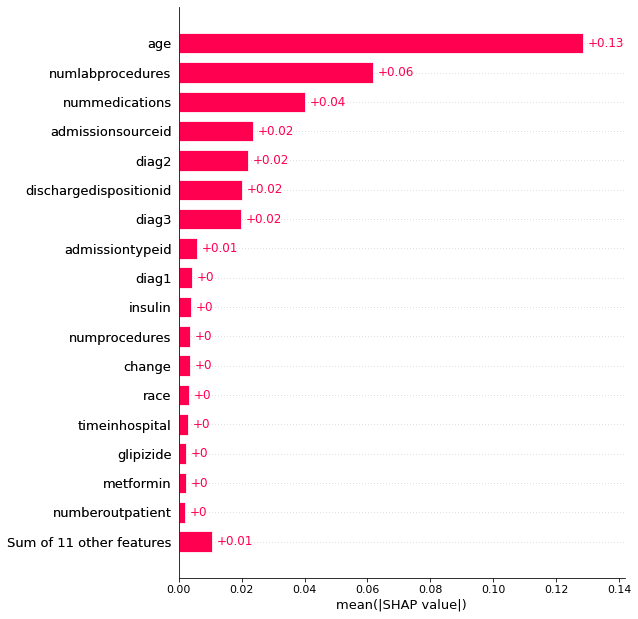

Split 1 of 1
time since start: 0.09937667846679688
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  2.0445687770843506
tpr_overall 0.24565567517165382
fpr_overall 0.24384538264453604
tpr_overall 0.2382467945803401
fpr_overall 0.24772257986153284
tpr_overall 0.24237672068304583
fpr_overall 0.23315820198482196
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 12.106672286987305
time since start: 12.206564903259277
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  4.131000995635986
tpr_overall 0.22531151987793507
fpr_overall 0.22229029742675727
tp

Permutation explainer: 501it [00:40,  9.48it/s]                         


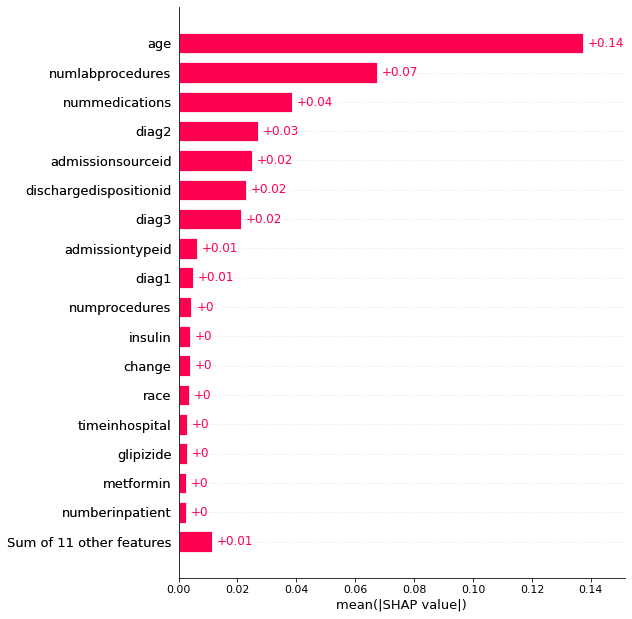

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'sex_Female', 'sex_Male', 'age', 'admissiontypeid',
       'dischargedispositionid', 'admissionsourceid', 'timeinhospital',
       'numlabprocedures', 'numprocedures', 'nummedications',
       'numberoutpatient', 'numberemergency', 'numberinpatient', 'diag1',
       'diag2', 'diag3', 'numberdiagnoses', 'maxgluserum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Split 0 of 10
Time since start: 0.015010595321655273
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.5710
best val constraints: [-0.04621950044511054, -0.05415556930499972, -0.051800465574425594, -0.048049212214789486]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100


Permutation explainer: 501it [00:24, 13.93it/s]                         


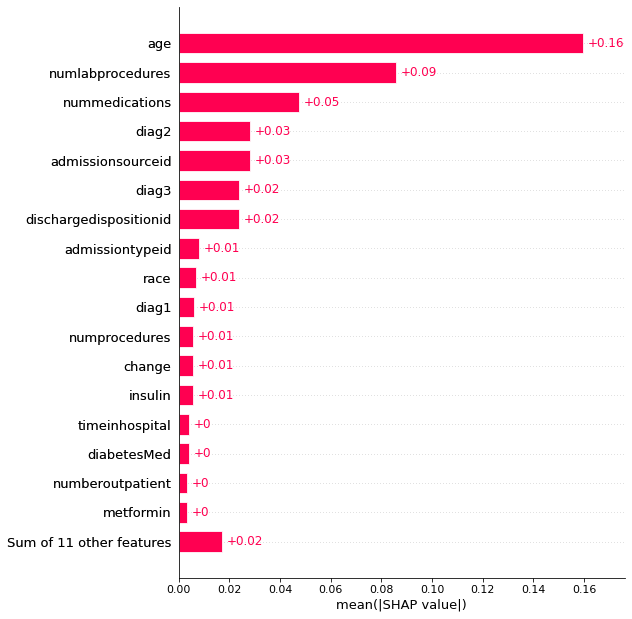

Split 1 of 1
time since start: 0.09591102600097656
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.9905567169189453
tpr_overall 0.2013366043481939
fpr_overall 0.2022308979364194
tpr_overall 0.20341770995156722
fpr_overall 0.19963680387409202
tpr_overall 0.2059282371294852
fpr_overall 0.20796719390743995
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 11.373381614685059
time since start: 11.469325065612793
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  2.122493267059326
tpr_overall 0.14431943152017596
fpr_overall 0.1430563301728946
tpr_o

Permutation explainer: 501it [00:21, 12.48it/s]                         


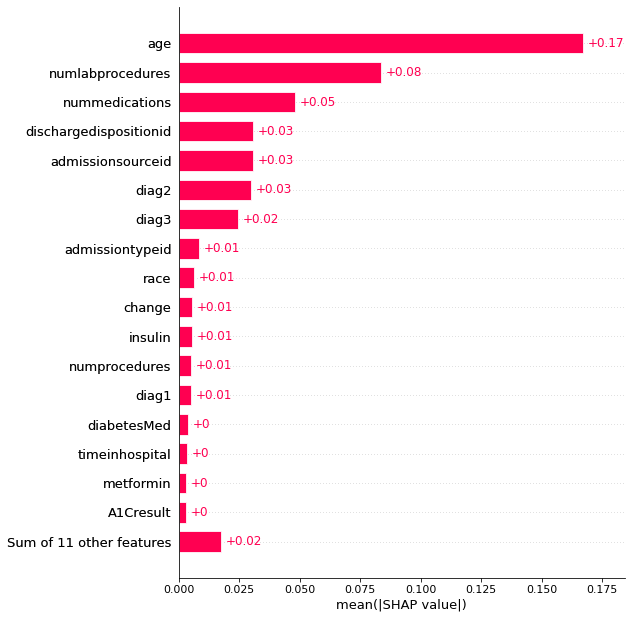

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'sex_Female', 'sex_Male', 'age', 'admissiontypeid',
       'dischargedispositionid', 'admissionsourceid', 'timeinhospital',
       'numlabprocedures', 'numprocedures', 'nummedications',
       'numberoutpatient', 'numberemergency', 'numberinpatient', 'diag1',
       'diag2', 'diag3', 'numberdiagnoses', 'maxgluserum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Split 0 of 10
Time since start: 0.011183500289916992
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.5647
best val constraints: [-0.050004434166274384, -0.04999541335546216, -0.05000013206455585, -0.0499998662721219]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
Ti

Permutation explainer: 501it [00:24, 14.15it/s]                         


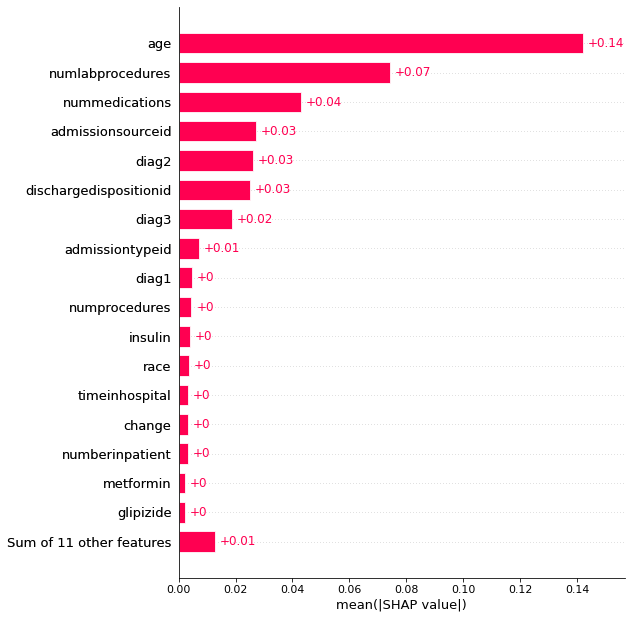

Split 1 of 1
time since start: 0.14885187149047852
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  2.010723352432251
tpr_overall 0.23971149766652525
fpr_overall 0.24212401202270956
tpr_overall 0.244109415906834
fpr_overall 0.24392774319541072
tpr_overall 0.24475401163815905
fpr_overall 0.2458009961774586
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 15.011468172073364
time since start: 15.160671949386597
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  4.52506160736084
tpr_overall 0.21781926177344083
fpr_overall 0.21885784259156185
tpr_ov

Permutation explainer: 501it [00:20, 12.42it/s]                         


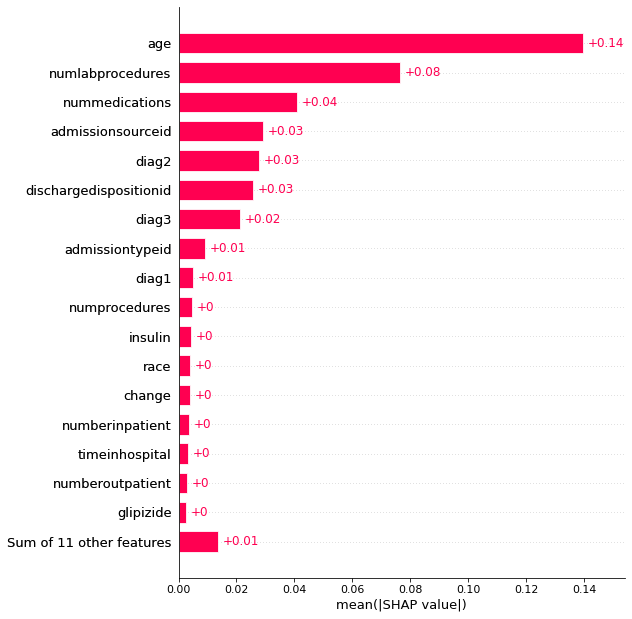

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'sex_Female', 'sex_Male', 'age', 'admissiontypeid',
       'dischargedispositionid', 'admissionsourceid', 'timeinhospital',
       'numlabprocedures', 'numprocedures', 'nummedications',
       'numberoutpatient', 'numberemergency', 'numberinpatient', 'diag1',
       'diag2', 'diag3', 'numberdiagnoses', 'maxgluserum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Split 0 of 10
Time since start: 0.010915040969848633
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.5712
best val constraints: [-0.05513189177997564, -0.04506552448882413, -0.049363478052002654, -0.05061598898193294]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
T

Permutation explainer: 501it [00:20, 12.67it/s]                         


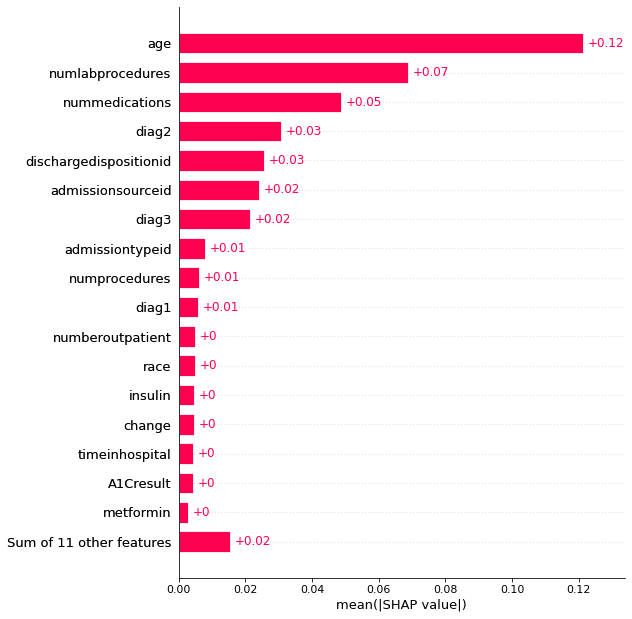

Split 1 of 1
time since start: 0.09524178504943848
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.839834213256836
tpr_overall 0.24567356633864948
fpr_overall 0.2426654790402494
tpr_overall 0.24199288256227758
fpr_overall 0.2437590887057683
tpr_overall 0.23574144486692014
fpr_overall 0.24418877670814745
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 11.130438804626465
time since start: 11.22613000869751
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.855431079864502
tpr_overall 0.22488971835765184
fpr_overall 0.22139954350609586
tpr_o

Permutation explainer: 501it [00:34, 10.69it/s]                         


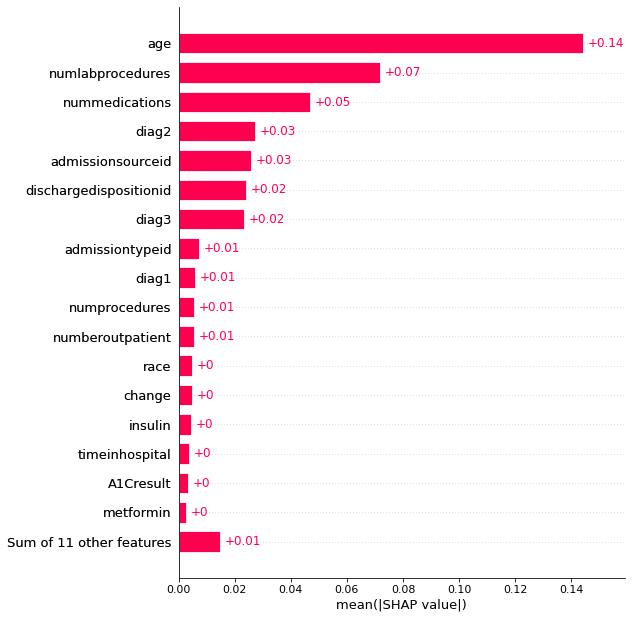

Index(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'sex_Female', 'sex_Male', 'age', 'admissiontypeid',
       'dischargedispositionid', 'admissionsourceid', 'timeinhospital',
       'numlabprocedures', 'numprocedures', 'nummedications',
       'numberoutpatient', 'numberemergency', 'numberinpatient', 'diag1',
       'diag2', 'diag3', 'numberdiagnoses', 'maxgluserum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Split 0 of 10
Time since start: 0.016368389129638672
Starting optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
best val objective: 0.5648
best val constraints: [-0.05169285483006021, -0.048520062733734395, -0.05538012363600771, -0.04498741570308058]
Finished optimizing learning rate theta: 0.100, learning rate lambda: 1.000, learning rate W: 0.100
T

Permutation explainer: 501it [00:20, 12.53it/s]                         


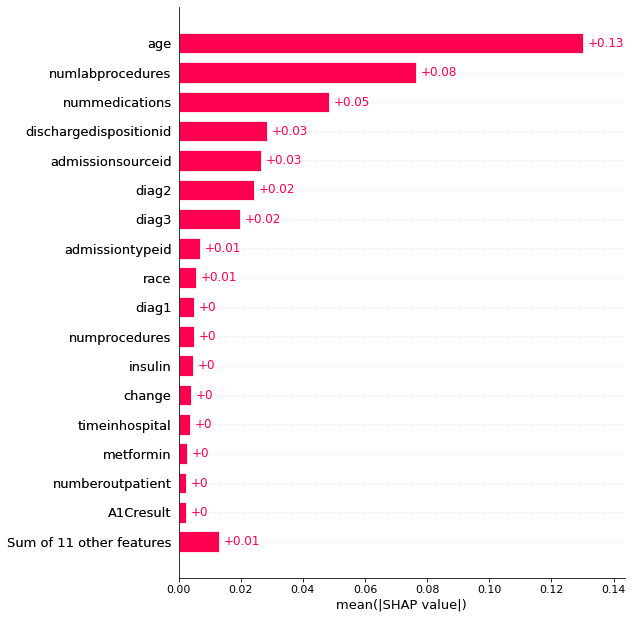

Split 1 of 1
time since start: 0.09550738334655762
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.100
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.7977254390716553
tpr_overall 0.24498159919705587
fpr_overall 0.24411351503231243
tpr_overall 0.24049700874367233
fpr_overall 0.24328232317146645
tpr_overall 0.23932072829131654
fpr_overall 0.2413873370577281
Finished learning rate p list [0.001, 0.001, 0.001]
Finished optimizing learning rate theta: 0.001 learning rate lambda: 0.100 
Time that this run took: 11.029874563217163
time since start: 11.125816106796265
begin optimizing learning rate p list: [0.001, 0.001, 0.001]
begin optimizing learning rate theta: 0.001 learning rate lambda: 0.500
minibatch is off
start loop  1 in loops  1
finish loop  1 in loops  1
time for this loop  1.8903281688690186
tpr_overall 0.2223987955838073
fpr_overall 0.2214667041303737
tpr

Permutation explainer: 501it [00:20, 12.46it/s]                         


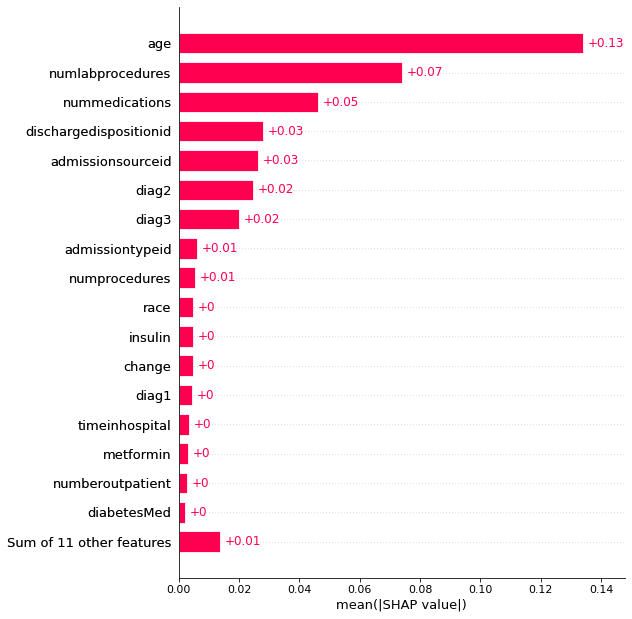

In [6]:
for frac in paths:
    path = paths[frac]
    
    train_df = pd.read_csv(path+'train.csv',header=None)

    train_df.columns = ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']
    
    train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    test_df = pd.read_csv(path+'test.csv',header=None)

    test_df.columns = ['race', 'sex', 'age', 'admissiontypeid', 'dischargedispositionid',
       'admissionsourceid', 'timeinhospital', 'numlabprocedures',
       'numprocedures', 'nummedications', 'numberoutpatient',
       'numberemergency', 'numberinpatient', 'diag1', 'diag2', 'diag3',
       'numberdiagnoses', 'maxgluserum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']

    X_train = train_df.drop(['readmitted'],axis=1)
    X_test = test_df.drop(['readmitted'],axis=1)

    Y_train = pd.Series(train_df['readmitted'])
    Y_test = pd.Series(test_df['readmitted'])

    Y_train = pd.Series(Y_train.factorize(sort=True)[0], index=Y_train.index)
    Y_test = pd.Series(Y_test.factorize(sort=True)[0], index=Y_test.index)

    X_merged = pd.concat([X_train,X_test])

    ohe = make_column_transformer(
        (OneHotEncoder(sparse=False), X_merged.dtypes == 'object'),
        remainder='passthrough', verbose_feature_names_out=False)

    X_merged_temp  = pd.DataFrame(ohe.fit_transform(X_merged), columns=ohe.get_feature_names_out(), index=X_merged.index)

    train_df  = pd.DataFrame(ohe.transform(X_train), columns=ohe.get_feature_names_out(), index=X_train.index)
    test_df = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out(), index=X_test.index)

    train_df['readmitted'] = Y_train
    test_df['readmitted'] = Y_test

    print(train_df.columns)

    LABEL_COLUMN = "readmitted"
    FEATURE_NAMES = list(train_df.columns)
    FEATURE_NAMES.remove(LABEL_COLUMN)
    PROTECTED_COLUMNS = ['sex_Female','sex_Male']

    PROXY_COLUMNS = PROTECTED_COLUMNS  
    
    valmain2,best_learning_rate_theta2,best_learning_rate_lambda2,best_learning_rate_W2 = softweights_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                                       PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1, constraint='tpr_and_fpr')

    swmodel = softweights_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta2, 
                                                        learning_rate_lambda = best_learning_rate_lambda2, learning_rate_W = best_learning_rate_W2, num_loops = 1,constraint='tpr_and_fpr')


    name = 'diabetes_soft_'+str(frac)
    
    dothings(swmodel,name)


    valmain,best_learning_rate_theta,best_learning_rate_lambda,best_learning_rate_p_list = dro_training.get_results_for_learning_rates(train_df, test_df, FEATURE_NAMES, 
                                                      PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, num_loops = 1,constraint='tpr_and_fpr')

    model = dro_training.get_model_for_learning_rates(train_df, test_df,  FEATURE_NAMES, PROTECTED_COLUMNS, PROXY_COLUMNS, LABEL_COLUMN, learning_rate_theta = best_learning_rate_theta, 
                                                        learning_rate_lambda = best_learning_rate_lambda, learning_rate_p_list = best_learning_rate_p_list, num_loops = 1,constraint='tpr_and_fpr')

    name = 'diabetes_mdro_'+str(frac)
    
    dothings(model,name)